# Importing Essential Libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings 
warnings.filterwarnings('ignore')

# Loading data and Making labels

In [33]:
path=r"C:\Users\hch0a\OneDrive\Desktop\skin\data\hmnist_28_28_RGB.csv"

In [34]:
df=pd.read_csv(path)

In [35]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


# Train Test Split

In [36]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [37]:
print(len(train_set))

8012


In [38]:
print(len(test_set))

2003


In [39]:
df.label.unique()

array([4, 6, 2, 5, 0, 1, 3], dtype=int64)

In [40]:
tabular_data = pd.read_csv(r"C:\Users\hch0a\OneDrive\Desktop\skin\data\HAM10000_metadata.csv")
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [41]:
tabular_data.columns


Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

## Exploratory Data Analysis and Preprocessing

In [42]:
lasses = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

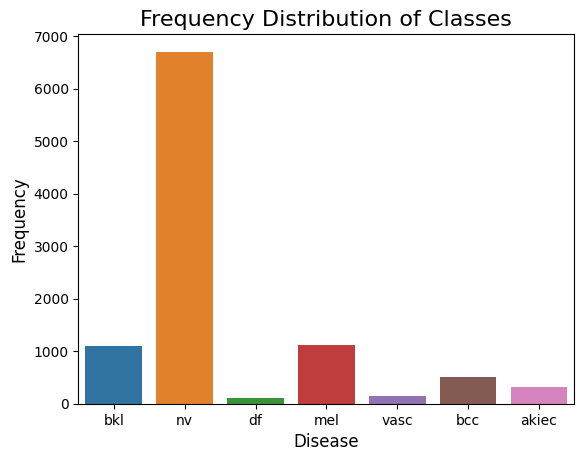

In [43]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

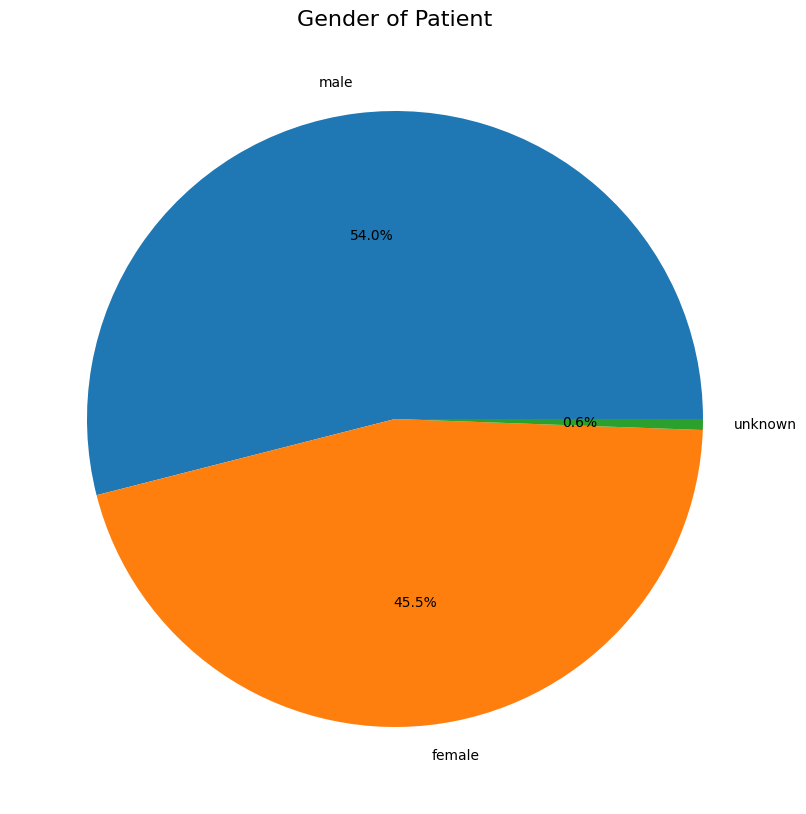

In [44]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

In [45]:
classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [46]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)

In [47]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


<Axes: ylabel='count'>

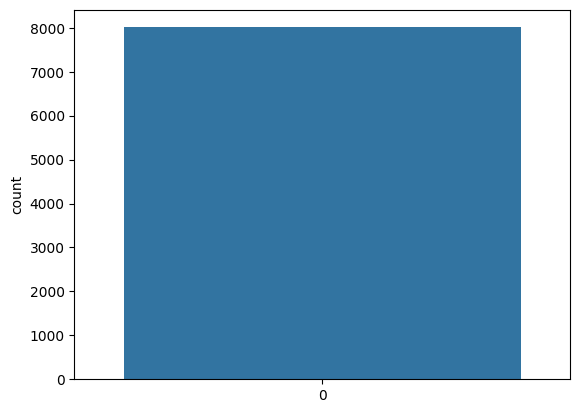

In [48]:


sns.countplot(train_set['label'])

In [49]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

<Axes: ylabel='count'>

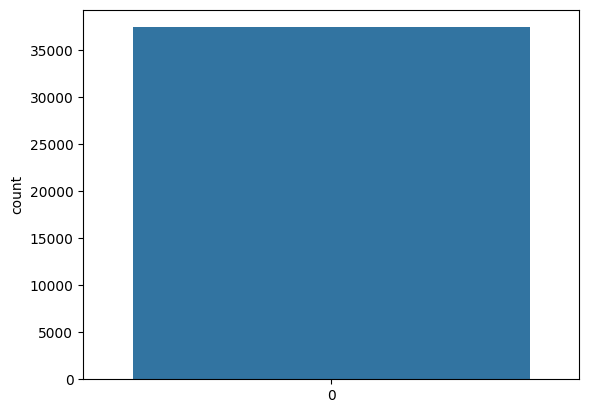

In [50]:
sns.countplot(y_train)

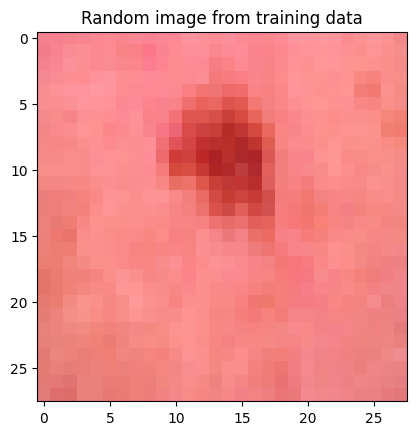

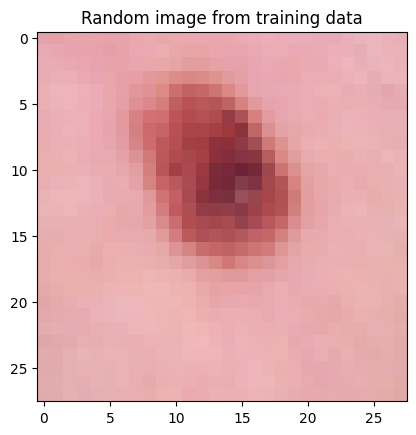

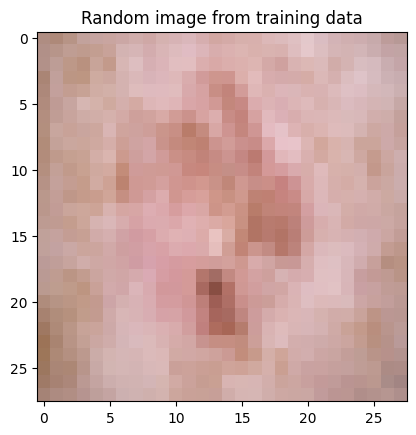

In [51]:

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

## Model Building (CNN)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [53]:
%time 

model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(256, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 14, 14, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_

# Setting Optimizer

In [23]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                              monitor='val_acc', 
                                              mode='max',
                                              verbose=1, 
                                              save_best_only=True)

In [24]:
%time 
optimizer=tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


# Fitting the model

In [22]:
from datetime import datetime
start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
236/236 [==============================] - ETA: 0s - loss: 1.1127 - accuracy: 0.6073WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 90ms/step - loss: 1.1127 - accuracy: 0.6073 - val_loss: 2.8413 - val_accuracy: 0.1308
Epoch 2/100
236/236 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8771WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 27s 113ms/step - loss: 0.3739 - accuracy: 0.8771 - val_loss: 1.6157 - val_accuracy: 0.3872
Epoch 3/100
236/236 [==============================] - ETA: 0s - loss: 0.2512 - accuracy: 0.9156WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 27s 115ms/step - loss: 0.2512 - accuracy: 0.9156 - val_loss: 0.9953 - val_accuracy: 0.5835
Epoch 4/100
236/236 [==============================] - ETA: 0s - loss: 0.1905 - accuracy: 0.9359WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 96ms/step - loss: 0.1905 - accuracy: 0.9359 - val_loss: 1.0973 - val_accuracy: 0.6392
Epoch 5/100
236/236 [==============================] - ETA: 0s - loss: 0.1628 - accuracy: 0.9454WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 112ms/step - loss: 0.1628 - accuracy: 0.9454 - val_loss: 1.5180 - val_accuracy: 0.3504
Epoch 6/100
236/236 [==============================] - ETA: 0s - loss: 0.1369 - accuracy: 0.9534WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 110ms/step - loss: 0.1369 - accuracy: 0.9534 - val_loss: 1.0129 - val_accuracy: 0.5696
Epoch 7/100
236/236 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9617WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 95ms/step - loss: 0.1113 - accuracy: 0.9617 - val_loss: 0.5686 - val_accuracy: 0.7226
Epoch 8/100
236/236 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.9634WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 22s 92ms/step - loss: 0.1080 - accuracy: 0.9634 - val_loss: 0.7320 - val_accuracy: 0.7035
Epoch 9/100
236/236 [==============================] - ETA: 0s - loss: 0.0930 - accuracy: 0.9678WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.0930 - accuracy: 0.9678 - val_loss: 0.5387 - val_accuracy: 0.8349
Epoch 10/100
236/236 [==============================] - ETA: 0s - loss: 0.0939 - accuracy: 0.9664WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0939 - accuracy: 0.9664 - val_loss: 0.5687 - val_accuracy: 0.6923
Epoch 11/100
236/236 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9768WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0706 - accuracy: 0.9768 - val_loss: 0.8011 - val_accuracy: 0.6204
Epoch 12/100
236/236 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9733WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 102ms/step - loss: 0.0759 - accuracy: 0.9733 - val_loss: 0.9132 - val_accuracy: 0.6756
Epoch 13/100
236/236 [==============================] - ETA: 0s - loss: 0.0695 - accuracy: 0.9747WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 111ms/step - loss: 0.0695 - accuracy: 0.9747 - val_loss: 0.3590 - val_accuracy: 0.8623
Epoch 14/100
236/236 [==============================] - ETA: 0s - loss: 0.0484 - accuracy: 0.9831WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 112ms/step - loss: 0.0484 - accuracy: 0.9831 - val_loss: 1.2624 - val_accuracy: 0.5795
Epoch 15/100
236/236 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 0.9801WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 110ms/step - loss: 0.0593 - accuracy: 0.9801 - val_loss: 0.2915 - val_accuracy: 0.8772
Epoch 16/100
236/236 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9835WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 110ms/step - loss: 0.0493 - accuracy: 0.9835 - val_loss: 1.1510 - val_accuracy: 0.6283
Epoch 17/100
236/236 [==============================] - ETA: 0s - loss: 0.0626 - accuracy: 0.9793WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 109ms/step - loss: 0.0626 - accuracy: 0.9793 - val_loss: 0.4204 - val_accuracy: 0.8171
Epoch 18/100
236/236 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9855WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 111ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.3405 - val_accuracy: 0.8632
Epoch 19/100
236/236 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9896WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 109ms/step - loss: 0.0306 - accuracy: 0.9896 - val_loss: 0.2008 - val_accuracy: 0.9284
Epoch 20/100
236/236 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9864WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 98ms/step - loss: 0.0417 - accuracy: 0.9864 - val_loss: 0.3250 - val_accuracy: 0.8945
Epoch 21/100
236/236 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9843WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 103ms/step - loss: 0.0453 - accuracy: 0.9843 - val_loss: 0.3210 - val_accuracy: 0.8802
Epoch 22/100
236/236 [==============================] - ETA: 0s - loss: 0.0370 - accuracy: 0.9877WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 102ms/step - loss: 0.0370 - accuracy: 0.9877 - val_loss: 0.0826 - val_accuracy: 0.9744
Epoch 23/100
236/236 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.9862WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 97ms/step - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.7632 - val_accuracy: 0.7473
Epoch 24/100
236/236 [==============================] - ETA: 0s - loss: 0.0251 - accuracy: 0.9914WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.0251 - accuracy: 0.9914 - val_loss: 0.2867 - val_accuracy: 0.8993
Epoch 25/100
236/236 [==============================] - ETA: 0s - loss: 0.0217 - accuracy: 0.9929WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 89ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.2916 - val_accuracy: 0.9342
Epoch 26/100
236/236 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9903WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 87ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.3184 - val_accuracy: 0.9048
Epoch 27/100
236/236 [==============================] - ETA: 0s - loss: 0.0330 - accuracy: 0.9888WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.2628 - val_accuracy: 0.9355
Epoch 28/100
236/236 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.9904WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.4777 - val_accuracy: 0.8322
Epoch 29/100
236/236 [==============================] - ETA: 0s - loss: 0.0192 - accuracy: 0.9936WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 86ms/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.4498 - val_accuracy: 0.8256
Epoch 30/100
236/236 [==============================] - ETA: 0s - loss: 0.0172 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.1707 - val_accuracy: 0.9424
Epoch 31/100
236/236 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9909WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 112ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.3148 - val_accuracy: 0.9010
Epoch 32/100
236/236 [==============================] - ETA: 0s - loss: 0.0183 - accuracy: 0.9941WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 26s 108ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.2841 - val_accuracy: 0.9194
Epoch 33/100
236/236 [==============================] - ETA: 0s - loss: 0.0199 - accuracy: 0.9934WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 25s 107ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.2031 - val_accuracy: 0.9347
Epoch 34/100
236/236 [==============================] - ETA: 0s - loss: 0.0219 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 87ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.2760 - val_accuracy: 0.9093
Epoch 35/100
236/236 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 104ms/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.1207 - val_accuracy: 0.9647
Epoch 36/100
236/236 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9929WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 100ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.3573 - val_accuracy: 0.8903
Epoch 37/100
236/236 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9950WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 103ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.4709 - val_accuracy: 0.8475
Epoch 38/100
236/236 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9909WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 25s 105ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.6090 - val_accuracy: 0.8097
Epoch 39/100
236/236 [==============================] - ETA: 0s - loss: 0.0097 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 100ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.2759 - val_accuracy: 0.9430
Epoch 40/100
236/236 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9929WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 99ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.6627 - val_accuracy: 0.7789
Epoch 41/100
236/236 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 0.9958WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 100ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.1354 - val_accuracy: 0.9569
Epoch 42/100
236/236 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 24s 101ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0792 - val_accuracy: 0.9772
Epoch 43/100
236/236 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 0.9947WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 23s 96ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.3263 - val_accuracy: 0.8922
Epoch 44/100
236/236 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9934WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 87ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.3999 - val_accuracy: 0.8670
Epoch 45/100
236/236 [==============================] - ETA: 0s - loss: 0.0137 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0137 - accuracy: 0.9957 - val_loss: 0.1445 - val_accuracy: 0.9501
Epoch 46/100
236/236 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.2830 - val_accuracy: 0.9029
Epoch 47/100
236/236 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0160 - val_accuracy: 0.9923
Epoch 48/100
236/236 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.0149 - val_accuracy: 0.9960
Epoch 49/100
235/236 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 1.3989 - val_accuracy: 0.7240
Epoch 50/100
236/236 [==============================] - ETA: 0s - loss: 0.0161 - accuracy: 0.9951WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.5341 - val_accuracy: 0.8678
Epoch 51/100
236/236 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9943WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 83ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.3104 - val_accuracy: 0.9098
Epoch 52/100
235/236 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9971WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0847 - val_accuracy: 0.9786
Epoch 53/100
236/236 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.9963WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 83ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.2587 - val_accuracy: 0.9204
Epoch 54/100
236/236 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 83ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.2142 - val_accuracy: 0.9369
Epoch 55/100
236/236 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9965WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.3089 - val_accuracy: 0.9125
Epoch 56/100
236/236 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9970WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0090 - accuracy: 0.9970 - val_loss: 0.0430 - val_accuracy: 0.9863
Epoch 57/100
236/236 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9964WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 87ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.2705 - val_accuracy: 0.9265
Epoch 58/100
235/236 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9940WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0365 - val_accuracy: 0.9830
Epoch 59/100
236/236 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0577 - val_accuracy: 0.9833
Epoch 60/100
235/236 [============================>.] - ETA: 0s - loss: 0.0045 - accuracy: 0.9985WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 85ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 0.5939 - val_accuracy: 0.8512
Epoch 61/100
236/236 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9977WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1132 - val_accuracy: 0.9654
Epoch 62/100
236/236 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9946WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.7465 - val_accuracy: 0.7882
Epoch 63/100
236/236 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9956WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0597 - val_accuracy: 0.9800
Epoch 64/100
236/236 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 65/100
236/236 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.1644 - val_accuracy: 0.9469
Epoch 66/100
236/236 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9969WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.7955 - val_accuracy: 0.7977
Epoch 67/100
236/236 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9969WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0601 - val_accuracy: 0.9812
Epoch 68/100
236/236 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0198 - val_accuracy: 0.9950
Epoch 69/100
236/236 [==============================] - ETA: 0s - loss: 0.0113 - accuracy: 0.9967WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.0356 - val_accuracy: 0.9863
Epoch 70/100
235/236 [============================>.] - ETA: 0s - loss: 0.0155 - accuracy: 0.9954WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.1987 - val_accuracy: 0.9389
Epoch 71/100
236/236 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0554 - val_accuracy: 0.9797
Epoch 72/100
236/236 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9983WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.1756 - val_accuracy: 0.9382
Epoch 73/100
236/236 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 1.0117 - val_accuracy: 0.7968
Epoch 74/100
236/236 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9974WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.2907 - val_accuracy: 0.9121
Epoch 75/100
236/236 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9971WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.2415 - val_accuracy: 0.9309
Epoch 76/100
236/236 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.2387 - val_accuracy: 0.9329
Epoch 77/100
236/236 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.9044 - val_accuracy: 0.7904
Epoch 78/100
236/236 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9959WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0224 - val_accuracy: 0.9903
Epoch 79/100
236/236 [==============================] - ETA: 0s - loss: 0.0036 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0287 - val_accuracy: 0.9903
Epoch 80/100
236/236 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9979WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.0533 - val_accuracy: 0.9806
Epoch 81/100
235/236 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.5633 - val_accuracy: 0.8571
Epoch 82/100
236/236 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.6193 - val_accuracy: 0.8595
Epoch 83/100
236/236 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9982WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.6126 - val_accuracy: 0.8549
Epoch 84/100
236/236 [==============================] - ETA: 0s - loss: 0.0176 - accuracy: 0.9948WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0910 - val_accuracy: 0.9671
Epoch 85/100
236/236 [==============================] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.2212 - val_accuracy: 0.9358
Epoch 86/100
236/236 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9992WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 21s 88ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0326 - val_accuracy: 0.9886
Epoch 87/100
236/236 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9957WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0372 - val_accuracy: 0.9932
Epoch 88/100
235/236 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0153 - val_accuracy: 0.9967
Epoch 89/100
236/236 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 20s 83ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.4157 - val_accuracy: 0.9049
Epoch 90/100
236/236 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9969WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0211 - val_accuracy: 0.9908
Epoch 91/100
236/236 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.4951 - val_accuracy: 0.8750
Epoch 92/100
236/236 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9991WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0080 - val_accuracy: 0.9983
Epoch 93/100
236/236 [==============================] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 80ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.7388 - val_accuracy: 0.8284
Epoch 94/100
236/236 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.9972WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 1.1632 - val_accuracy: 0.7732
Epoch 95/100
236/236 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9968WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.0344 - val_accuracy: 0.9923
Epoch 96/100
236/236 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9978WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 79ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0632 - val_accuracy: 0.9785
Epoch 97/100
236/236 [==============================] - ETA: 0s - loss: 0.0042 - accuracy: 0.9989WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 98/100
236/236 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9982WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0725 - val_accuracy: 0.9834
Epoch 99/100
236/236 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9988WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 82ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0154 - val_accuracy: 0.9940
Epoch 100/100
236/236 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9975WARNING:tensorflow:Can save best model only with val_acc available, skipping.


236/236 [==============================] - 19s 81ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.2325 - val_accuracy: 0.9200
Duration: 0:35:11.187866


In [26]:
import pickle

training_history = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
    'val_loss': history.history['val_loss'],
    'val_accuracy': history.history['val_accuracy']
}
with open('training_history.pkl', 'wb') as file:
    pickle.dump(training_history, file)
model.save('trained_model.h5')

print("Training history and model saved successfully.")

NameError: name 'history' is not defined

# Model Evaluation

In [27]:
#plot of accuracy vs epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [28]:
#plot of loss vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [29]:
x_test=np.array(x_test).reshape(-1,28,28,3)
loss, acc = model.evaluate(x_test, y_test, verbose=1)

63/63 [==============================] - 2s 15ms/step - loss: 7.4790 - accuracy: 0.1083


# Result

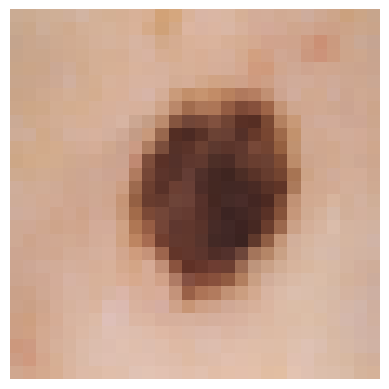

1/1 [==============================] - 0s 348ms/step
[9.24552232e-02 3.33758024e-03 8.88044238e-01 5.41959750e-03
 3.08712333e-04 1.01886885e-02 2.45879433e-04]
('bkl', 'benign keratosis-like lesions')


In [30]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
image = PIL.Image.open(r"C:\Users\hch0a\OneDrive\Desktop\skin\data\HAM10000_images_part_1\ISIC_0024319.jpg")
image = image.resize((28, 28))
img = np.array(image)

plt.imshow(img)
plt.axis('off') 
plt.show()
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

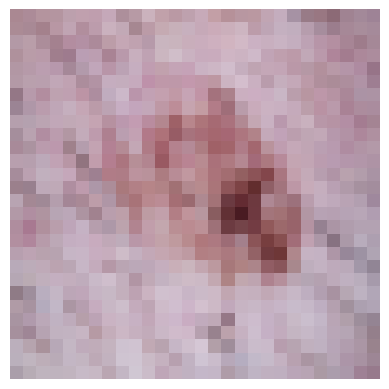

1/1 [==============================] - 0s 29ms/step
[2.2252372e-02 1.4724532e-03 9.7422123e-01 7.5916504e-04 4.2006835e-05
 1.1021353e-03 1.5055914e-04]
('bkl', 'benign keratosis-like lesions')


In [31]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO 
image = PIL.Image.open(r"C:\Users\hch0a\OneDrive\Desktop\skin\data\HAM10000_images_part_1\ISIC_0024420.jpg")
image = image.resize((28, 28))
img = np.array(image)
plt.imshow(img)
plt.axis('off')
plt.show()
img = x_test[1]
img = np.array(image).reshape(-1, 28, 28, 3)
result = model.predict(img)
print(result[0])
result = result.tolist()
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])